In [1]:

!pip install newsapi-python

In [2]:
import nltk
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to C:\Users\karan
[nltk_data]     bansal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [5]:
pd.set_option('display.max_colwidth',1000)

In [6]:

NEWS_API_KEY = '1142c2de5799402884dc1a4c91168862'

In [7]:

newsapi = NewsApiClient(api_key= NEWS_API_KEY)
keywrd = 'Tesla stock'
my_date = date.today() - timedelta(days=1) 
# datetime.strptime('10-Apr-2021','%d-%b-%Y')

articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      #sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)

In [8]:
articles

{'status': 'ok',
 'totalResults': 5,
 'articles': [{'source': {'id': None, 'name': 'Investing.com'},
   'author': 'Investing.com',
   'title': "Cathie Wood's ARK buys Tempus AI stock, sells Tesla and Palantir",
   'description': "Cathie Wood's ARK buys Tempus AI stock, sells Tesla and Palantir",
   'url': 'https://www.investing.com/news/company-news/cathie-woods-ark-buys-tempus-ai-stock-sells-tesla-and-palantir-93CH-3783541',
   'urlToImage': 'https://i-invdn-com.investing.com/redesign/images/seo/investing_300X300.png',
   'publishedAt': '2024-12-20T01:01:27Z',
   'content': "Cathie Wood's ARK ETF published their daily trades for Thursday, December 19th, 2024, revealing a series of strategic moves in the tech and biotech sectors. The most significant transaction of the da… [+1986 chars]"},
  {'source': {'id': None, 'name': 'Biztoc.com'},
   'author': 'thestreet.com',
   'title': 'Analyst resets Amazon stock forecast on huge ‘moonshot’',
   'description': 'Space is infinite, but it may 

In [9]:
PHRASES = ['Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.',\
           'Wow, how things change.',\
           'Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.',\
           'Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.']

for phrase in PHRASES:
  print(f'{phrase}')
  print(sia.polarity_scores(phrase))

Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.
{'neg': 0.084, 'neu': 0.603, 'pos': 0.313, 'compound': 0.7624}
Wow, how things change.
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.5719}
Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}


In [10]:
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  newsapi = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(), 
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])      
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

   Sentiment  \
0     0.0000   
1     0.2500   
2    -0.8316   
3     0.4404   
4     0.8371   

                                                                                                                         URL  \
0    https://www.investing.com/news/company-news/cathie-woods-ark-buys-tempus-ai-stock-sells-tesla-and-palantir-93CH-3783541   
1                                                                                      https://biztoc.com/x/35c17d257bcec994   
2  https://www.investing.com/news/stock-market-news/us-stock-futures-drop-as-trumpbacked-spending-bill-fails-to-pass-3783589   
3                             http://www.newsbtc.com/bitcoin-news/hut-8-bitcoin-holdings-now-over-1-billion-with-latest-buy/   
4                       https://www.fool.com.au/2024/12/20/here-are-the-10-most-traded-asx-shares-and-us-stocks-in-november/   

                                                               Title  \
0   Cathie Wood's ARK buys Tempus AI stock, sells Tesla and Pa

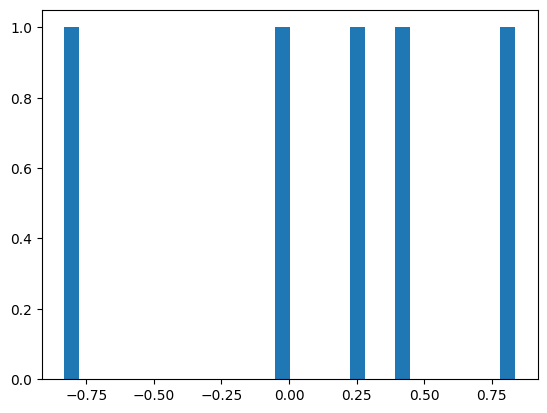

In [14]:
my_date = date.today() - timedelta(days=1) 

return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = my_date, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30, grid=False)
print(return_articles)